## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade | 
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

Informações sobre o DataFrame X:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB
None

Primeiras linhas do DataFrame X:
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  2

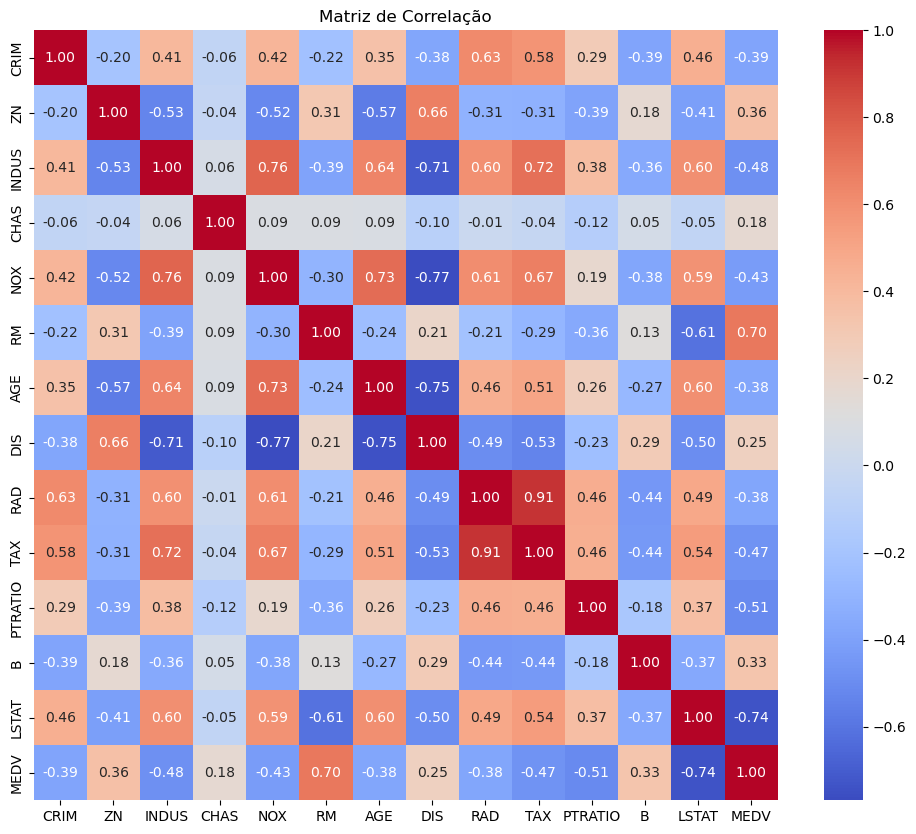

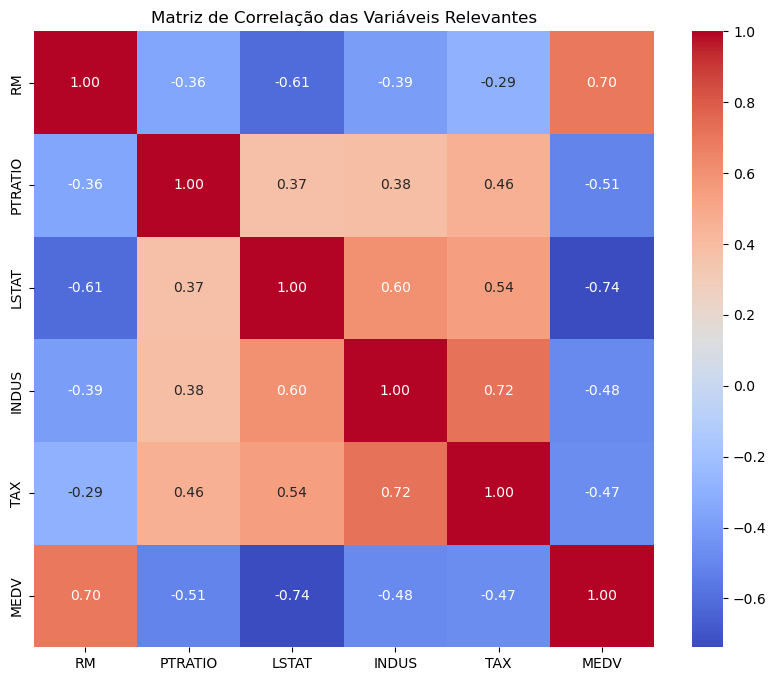

DecisionTreeRegressor(max_depth=8, random_state=42)

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Carregando os dados de Boston a partir da fonte secundária
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

X = pd.DataFrame(data, columns=[
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"
])
y = pd.DataFrame(target, columns=['MEDV'])

# Exibindo informações e as primeiras linhas dos DataFrames
print("Informações sobre o DataFrame X:")
print(X.info())

print("\nPrimeiras linhas do DataFrame X:")
print(X.head())

print("\nInformações sobre o DataFrame y:")
print(y.info())

print("\nPrimeiras linhas do DataFrame y:")
print(y.head())

# Criando a matriz de correlação e exibindo o heatmap
data_with_target = pd.concat([X, y], axis=1)
correlation_matrix = data_with_target.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()

# Selecionando as variáveis explicativas relevantes e criando uma nova matriz de correlação para elas
relevant_columns = ['RM', 'PTRATIO', 'LSTAT', 'INDUS', 'TAX', 'MEDV']
data_with_target_relevant = data_with_target[relevant_columns]
correlation_matrix_relevant = data_with_target_relevant.corr()

# Exibindo o heatmap da matriz de correlação para as variáveis relevantes
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_relevant, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlação das Variáveis Relevantes")
plt.show()

# Separando os dados em variáveis explicativas e variável de resposta e dividindo em conjuntos de treinamento (validação) e teste
X = data_with_target_relevant.drop(columns=['MEDV'])
y = data_with_target_relevant['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criando o modelo da árvore de regressão com profundidade máxima 8 e treinando-o com os dados de treinamento
tree_max_depth_8 = DecisionTreeRegressor(max_depth=8, random_state=42)
tree_max_depth_8.fit(X_train, y_train)


In [9]:
X.head()

,RM,PTRATIO,LSTAT,INDUS,TAX
0,6.575,15.3,4.98,2.31,296.0
1,6.421,17.8,9.14,7.07,242.0
2,7.185,17.8,4.03,7.07,242.0
3,6.998,18.7,2.94,2.18,222.0
4,7.147,18.7,5.33,2.18,222.0


In [10]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

In [11]:
# Calculando os caminhos indicados pelos CCP-alfas
ccp_alphas_decision_path = tree_max_depth_8.decision_path(X_train)

# Exibindo os caminhos indicados pelos CCP-alfas
print("Caminhos indicados pelos CCP-alfas:")
print(ccp_alphas_decision_path)

Caminhos indicados pelos CCP-alfas:
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 5)	1
  (0, 6)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 26)	1
  (1, 27)	1
  (1, 28)	1
  (1, 36)	1
  (1, 40)	1
  (1, 42)	1
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 26)	1
  (2, 27)	1
  (2, 28)	1
  (2, 36)	1
  (2, 40)	1
  (2, 41)	1
  :	:
  (351, 2)	1
  (351, 26)	1
  (351, 52)	1
  (351, 53)	1
  (351, 59)	1
  (351, 63)	1
  (351, 65)	1
  (352, 0)	1
  (352, 1)	1
  (352, 71)	1
  (352, 107)	1
  (352, 121)	1
  (352, 122)	1
  (352, 130)	1
  (352, 131)	1
  (352, 133)	1
  (353, 0)	1
  (353, 1)	1
  (353, 2)	1
  (353, 26)	1
  (353, 27)	1
  (353, 43)	1
  (353, 47)	1
  (353, 49)	1
  (353, 50)	1


### 3. Paca cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

In [12]:
# Criando a lista de alfas possíveis (de 0 a 0.1 em incrementos de 0.001)
alphas = np.arange(0, 0.1, 0.001)

# Lista para armazenar as árvores treinadas
trees_list = []

# Loop para treinar uma árvore com cada alfa e guardar na lista
for alpha in alphas:
    tree = DecisionTreeRegressor(ccp_alpha=alpha, random_state=42)
    tree.fit(X_train, y_train)
    trees_list.append(tree)


### 4. Para cada árvore na lista, calcule o MSE da árvore.

In [13]:
# Lista para armazenar os MSEs das árvores
mse_list = []

# Loop para calcular o MSE para cada árvore na lista
for tree in trees_list:
    # Obtendo as previsões para o conjunto de treinamento
    y_pred_train = tree.predict(X_train)
    # Calculando o MSE para o conjunto de treinamento
    mse_train = mean_squared_error(y_train, y_pred_train)

    # Obtendo as previsões para o conjunto de teste
    y_pred_test = tree.predict(X_test)
    # Calculando o MSE para o conjunto de teste
    mse_test = mean_squared_error(y_test, y_pred_test)

    # Armazenando os valores de MSE na lista
    mse_list.append((mse_train, mse_test))


### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

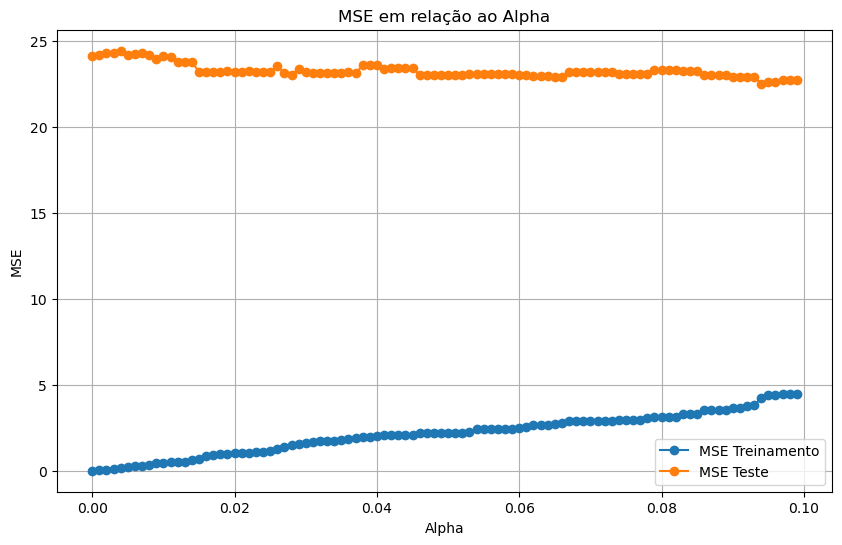

In [14]:
import matplotlib.pyplot as plt

# Lista para armazenar os valores de alpha e os MSEs correspondentes
alpha_mse_list = []

# Loop para calcular o MSE para cada árvore na lista
for alpha, tree in zip(alphas, trees_list):
    # Obtendo as previsões para o conjunto de treinamento
    y_pred_train = tree.predict(X_train)
    # Calculando o MSE para o conjunto de treinamento
    mse_train = mean_squared_error(y_train, y_pred_train)

    # Obtendo as previsões para o conjunto de teste
    y_pred_test = tree.predict(X_test)
    # Calculando o MSE para o conjunto de teste
    mse_test = mean_squared_error(y_test, y_pred_test)

    # Armazenando os valores de alpha e MSE na lista
    alpha_mse_list.append((alpha, mse_train, mse_test))

# Separando os valores de alpha, MSE de treinamento e MSE de teste
alphas, mse_train_values, mse_test_values = zip(*alpha_mse_list)

# Criando o gráfico do MSE em relação ao alpha
plt.figure(figsize=(10, 6))
plt.plot(alphas, mse_train_values, label='MSE Treinamento', marker='o')
plt.plot(alphas, mse_test_values, label='MSE Teste', marker='o')
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.title('MSE em relação ao Alpha')
plt.legend()
plt.grid(True)
plt.show()



### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [15]:
# Índice do valor de alpha escolhido no gráfico
index_alpha = 18

# Obtendo a árvore correspondente ao valor de alpha escolhido
tree_chosen = trees_list[index_alpha]

# Obtendo as previsões para o conjunto de teste
y_pred_test_chosen = tree_chosen.predict(X_test)

# Calculando o R-quadrado para a árvore escolhida
from sklearn.metrics import r2_score
r2_chosen = r2_score(y_test, y_pred_test_chosen)

# Exibindo o resultado do R-quadrado
print("R-quadrado da árvore escolhida (alpha = {:.3f}): {:.4f}".format(alphas[index_alpha], r2_chosen))


R-quadrado da árvore escolhida (alpha = 0.018): 0.6887


### 7. Visualize esta árvore.

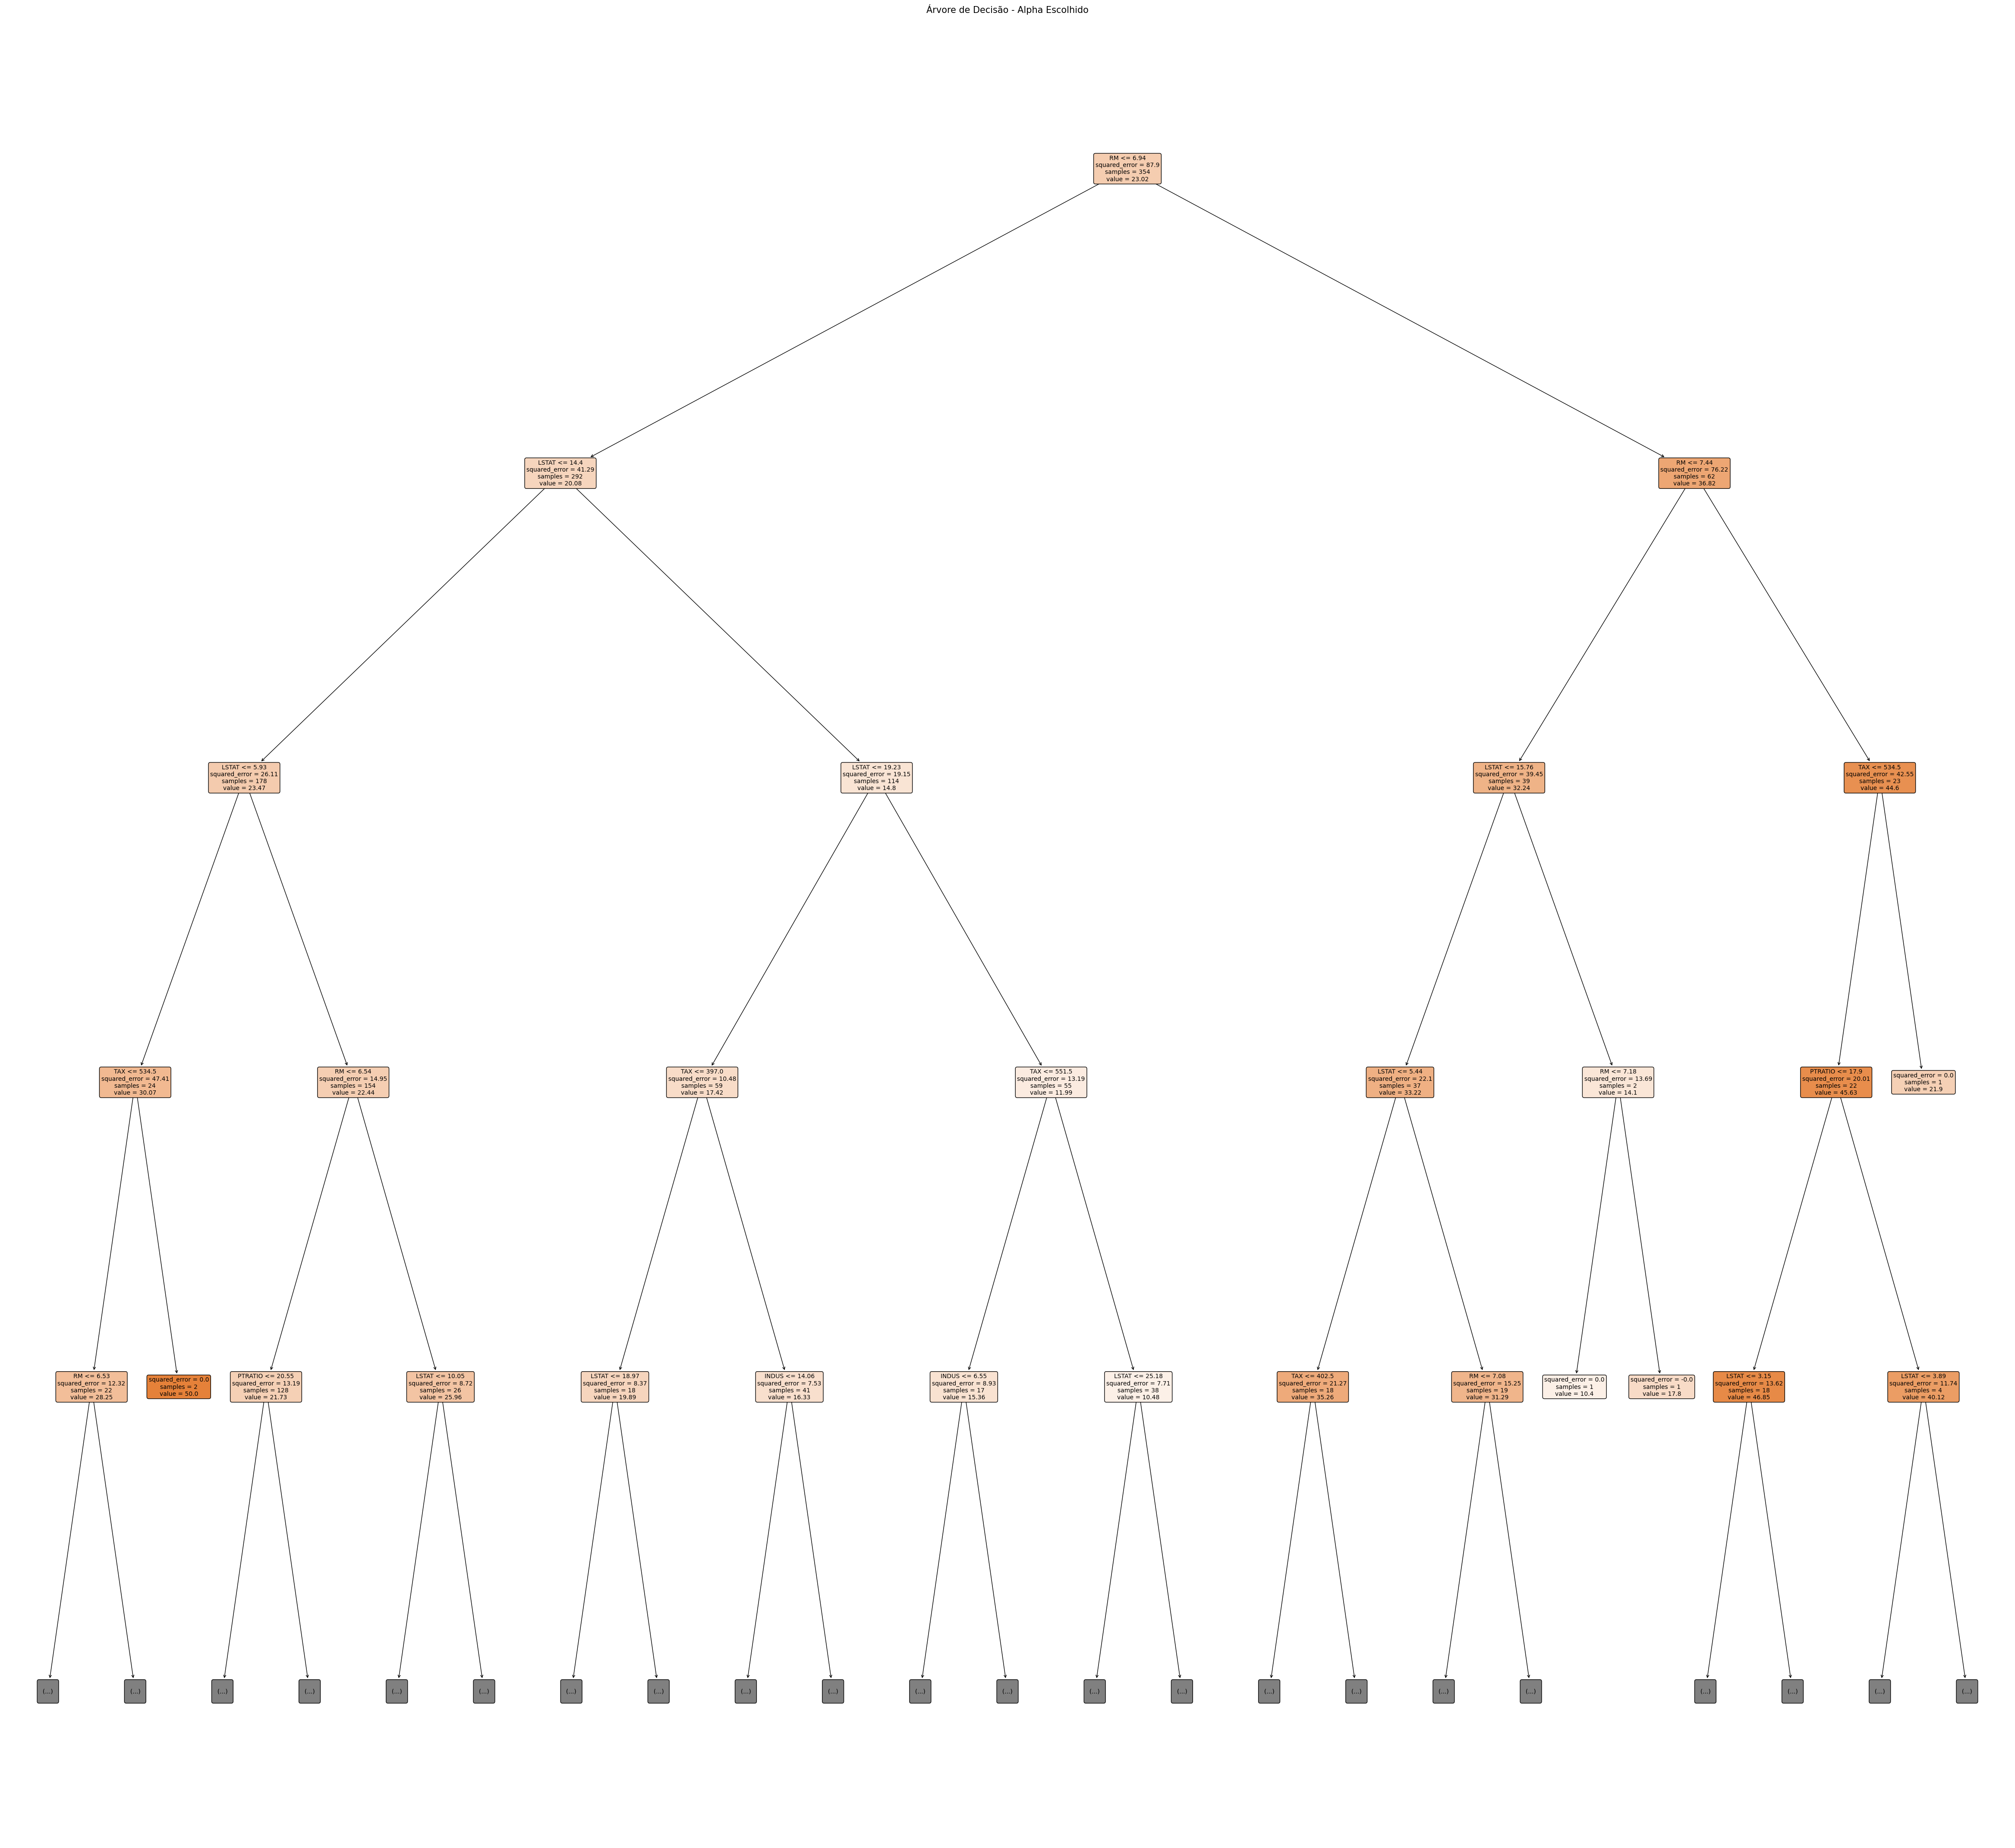

In [36]:
# Visualizando a árvore de decisão com o valor de alpha escolhido
plt.figure(figsize=(60, 55))
plot_tree(tree_chosen, feature_names=X.columns, filled=True, rounded=True, fontsize=10, max_depth=4, precision=2)
plt.title("Árvore de Decisão - Alpha Escolhido", fontsize=15)
plt.show()